# This exam is due on 10/25/2020 Friday at 11:59 PM

### Read the following instructions carefully.

1. There are 5 problems in this test, and each is worth 12 points. There is also a bonus problem that is worth 10 points.

2. Collaborating is not allowed in this Exam. Piazza common forum will be in a radio silence during this Exam. You should not share your code in the piazza or anywhere, either. If you need to ask me something, make it a private post. I will be running plagiarism software to check all the submitted solutions. Any academic misconduct will be reported to the dean of students office immediately.

3. You can use our textbooks, posted lab and HWs solutions, and the internet to get help with the Exam.

4. Each problem and parts of these problems should be answered with codes and written analysis. Missing one or more of these codes and analysis is considered to be an incomplete solution.

5. When you solve exam problems, I want you to clean up the final submission file. For example, do not show the whole data if it is not asked. Do not print unnecessary output. Clearly label the solutions and write solutions right underneath the problem.

6. Submit the exam part 2 in Canvas by following the link in canvas. Both files: html and ipynb are required for your exam 1 solution to be graded.


This exam uses diabetes data. More details about the data can be found in the following link.
https://data.world/data-society/pima-indians-diabetes-database

### Problem 1
Upload the diabetes data, remove the null values if there is any and check the data types of all the variables to make sure that variables are labeled correctly. Report the dimensions of the data and use the describe function to display various facts about the data.

#### Solution: 
Dimension of data: 9 columns, 768 rows.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
diab = pd.read_csv('diabetes.csv', decimal = ',')
diab['BMI'] = diab['BMI'].astype(float)
diab = diab[(diab["Glucose"] > 0) & (diab["BloodPressure"] > 0) & (diab["BMI"] > 0)]
diab['DiabetesPedigreeFunction'] = diab['DiabetesPedigreeFunction'].astype(float)
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
diab.shape

(724, 9)

In [3]:
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

###  Problem 2
The Glucose variable lists all the Pima Indian women's glucose in the data set after 2 hours of the glucose tolerance test. Suppose a prediabetic person's blood glucose ranges between 140 and 199 mg/dl (both included). Also, anybody who has a BMI of more than 30 is obese. Find out how many prediabetic Pima Indian women who were obese did not have diabetes. Make at least one more observation about these women by looking at the data you came up with.

#### Solution:
There are 37 women in the data set that were prediabetic, obese, and did not have diabetes. The mean insulin level, skinthickness, and bp of these women is higher than the overall mean insulin level, skinthickness, and bp of the set.

In [4]:
preobesenodiab = diab.loc[(diab["Glucose"]>= 140) & (diab["Glucose"]<= 199) & (diab["BMI"] > 30) & (diab["Outcome"] == 0)]
preobesenodiab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0
mean,3.864865,156.945946,77.270270,27.945946,192.297297,37.448649,0.558946,35.621622,0.0
std,3.400671,14.839785,8.748488,14.096780,200.324163,5.521354,0.490387,12.495224,0.0
min,0.000000,140.000000,62.000000,0.000000,0.000000,30.100000,0.134000,22.000000,0.0
25%,1.000000,146.000000,70.000000,25.000000,0.000000,32.800000,0.255000,26.000000,0.0
50%,3.000000,153.000000,78.000000,31.000000,140.000000,35.500000,0.341000,31.000000,0.0
75%,6.000000,165.000000,84.000000,39.000000,293.000000,40.800000,0.687000,44.000000,0.0
max,13.000000,197.000000,95.000000,54.000000,744.000000,52.300000,2.329000,65.000000,0.0


### Problem 3
 Let's define a new variable called Weight as follows: underweight if  BMI $<$ 18.5;
normalweight if  18.5 $\leq $ BMI $<$ 25; overweight if  25 $\leq $ BMI $<$ 30; and 
obese if  BMI $\geq 30$. How many Pima Indian Women are in each category?

#### Solution:
There are 453 women who are obese, 171 who are overweight, 96 who are normalweight, and 4 who are underweight.

In [5]:
diab['Weight'] = np.select([(diab['BMI'] < 18.5), (diab['BMI'] >= 18.5) & (diab['BMI']<25), (diab['BMI']>=25)&(diab['BMI']<30),(diab['BMI']>=30)],['underweight','normalweight','overweight','obese'])
diab.Weight.value_counts()

obese           453
overweight      171
normalweight     96
underweight       4
Name: Weight, dtype: int64

### Problem 4
Plot the following: Vertical bar graph of the Weight variable, a pie chart of the Outcome variable, histogram (with 10 bins) of the Age variable, and scatter plot of the variables BMI (in x-axis) BloodPressure ( in the y-axis). Add labels, titles, legends, different colors for different graphs in your plots. Finally, make at least one observation from each of the plots.

#### Solution:
Plots below  
Observations:  
Vertical Bar Graph: They are over 400 women who are obese, which is more than the other three categories of weight combined. There are very few who are underweight.     
Pie Chart: A majority of the women did not end up with diabetes.  
Histogram: The histogram is skewed right. There are a lot more younger women than older women in this data set.  
Scatter Plot: Most Blood Pressures are between 40 and 100. Most BMIs are between 20 and 50.  

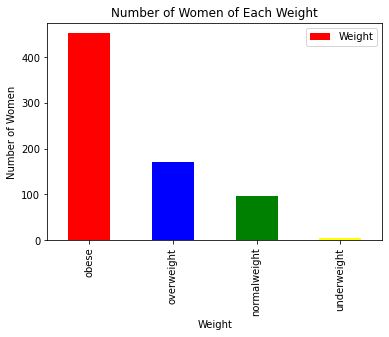

In [6]:
plot1 = diab['Weight'].value_counts().plot(kind='bar', color=['red','blue','green','yellow'], title='Number of Women of Each Weight')
plt.legend()
plt.xlabel("Weight")
plt.ylabel("Number of Women")
plt.show()

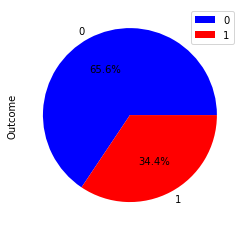

In [7]:
plot2 = diab['Outcome'].value_counts().plot(kind='pie', autopct = '%1.1f%%', colormap ='bwr')
plt.legend()
plt.show()

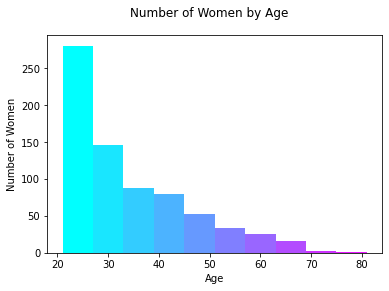

In [8]:
n, bins, patches = plt.hist(diab['Age'], 10, color='green')
cm = plt.cm.cool
plt.xlabel("Age")
plt.ylabel("Number of Women")
plt.suptitle("Number of Women by Age")
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/10))
plt.show()

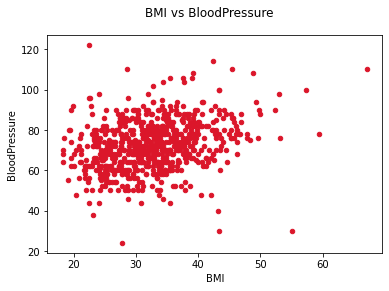

In [9]:
plot4 = diab.plot.scatter(x='BMI',y='BloodPressure', color='#db162a')
plt.suptitle("BMI vs BloodPressure")
plt.show()

### Problem 5
For all the variables (except Outcome), determine how many outliers each variable has below and above. Test and find out one variable at a time :'(. Which variable has the highest numbers of outliers? Why do you think this is the case?

#### Solution:
Number of Outliers:  
Pregnancies: 4  
Glucose: 0  
Blood Pressure: 14  
Skin Thickness: 1  
Insulin: 29  
BMI: 7  
Diabetes Pedigree Function: 28  
Age: 7

Insulin has the highest number of outliers. I think this is the case because a majority of insulin levels are going to be pretty low, but some really bad cases would be much higher and then be outliers. While most of the other data are more spread out so they wouldn't be as far out of the range.

In [11]:
pregnanciesout = diab[(diab["Pregnancies"] < (diab["Pregnancies"].quantile(.25) - (1.5*(diab["Pregnancies"].quantile(.75)-diab["Pregnancies"].quantile(.25))))) | (diab["Pregnancies"] > (diab["Pregnancies"].quantile(.75) + (1.5*(diab["Pregnancies"].quantile(.75)-diab["Pregnancies"].quantile(.25)))))]
pregnanciesout.shape

(4, 10)

In [12]:
glucoseout = diab[(diab["Glucose"] < (diab["Glucose"].quantile(.25) - (1.5*(diab["Glucose"].quantile(.75)-diab["Glucose"].quantile(.25))))) | (diab["Glucose"] > (diab["Glucose"].quantile(.75) + (1.5*(diab["Glucose"].quantile(.75)-diab["Glucose"].quantile(.25)))))]
glucoseout.shape

(0, 10)

In [13]:
bpout = diab[(diab["BloodPressure"] < (diab["BloodPressure"].quantile(.25) - (1.5*(diab["BloodPressure"].quantile(.75)-diab["BloodPressure"].quantile(.25))))) | (diab["BloodPressure"] > (diab["BloodPressure"].quantile(.75) + (1.5*(diab["BloodPressure"].quantile(.75)-diab["BloodPressure"].quantile(.25)))))]
bpout.shape

(14, 10)

In [14]:
skinout = diab[(diab["SkinThickness"] < (diab["SkinThickness"].quantile(.25) - (1.5*(diab["SkinThickness"].quantile(.75)-diab["SkinThickness"].quantile(.25))))) | (diab["SkinThickness"] > (diab["SkinThickness"].quantile(.75) + (1.5*(diab["SkinThickness"].quantile(.75)-diab["SkinThickness"].quantile(.25)))))]
skinout.shape

(1, 10)

In [15]:
insulinout = diab[(diab["Insulin"] < (diab["Insulin"].quantile(.25) - (1.5*(diab["Insulin"].quantile(.75)-diab["Insulin"].quantile(.25))))) | (diab["Insulin"] > (diab["Insulin"].quantile(.75) + (1.5*(diab["Insulin"].quantile(.75)-diab["Insulin"].quantile(.25)))))]
insulinout.shape

(29, 10)

In [16]:
bmiout = diab[(diab["BMI"] < (diab["BMI"].quantile(.25) - (1.5*(diab["BMI"].quantile(.75)-diab["BMI"].quantile(.25))))) | (diab["BMI"] > (diab["BMI"].quantile(.75) + (1.5*(diab["BMI"].quantile(.75)-diab["BMI"].quantile(.25)))))]
bmiout.shape

(7, 10)

In [17]:
dpfout = diab[(diab["DiabetesPedigreeFunction"] < (diab["DiabetesPedigreeFunction"].quantile(.25) - (1.5*(diab["DiabetesPedigreeFunction"].quantile(.75)-diab["DiabetesPedigreeFunction"].quantile(.25))))) | (diab["DiabetesPedigreeFunction"] > (diab["DiabetesPedigreeFunction"].quantile(.75) + (1.5*(diab["DiabetesPedigreeFunction"].quantile(.75)-diab["DiabetesPedigreeFunction"].quantile(.25)))))]
dpfout.shape

(28, 10)

In [18]:
ageout = diab[(diab["Age"] < (diab["Age"].quantile(.25) - (1.5*(diab["Age"].quantile(.75)-diab["Age"].quantile(.25))))) | (diab["Age"] > (diab["Age"].quantile(.75) + (1.5*(diab["Age"].quantile(.75)-diab["Age"].quantile(.25)))))]
ageout.shape

(7, 10)

#### Problem 6 (Bonus, Optional, 10 points)
A  new $\geq 40$ year-old obese Pima Indian Women named Chenoa has the data as follows: Chenoa had 6 or more pregnancies, has a glucose reading of 140 or more, and has hypertension (Bloodpressure > 80). What is the probability that Chenoa has diabetes?

#### Solution:
I believe that based on this data there is an 81.48% chance that Chenoa has diabetes. I am not sure how reliable this data is or if the conditions are met to make an accurate prediction.

In [19]:
ExactlylikeChenoa = diab[(diab["Age"] >= 40) & (diab["Glucose"] >= 140) & (diab["Pregnancies"] >= 6) & (diab["BloodPressure"] > 80)]
ExactlylikeChenoa.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,8.925926,163.333333,90.185185,20.037037,108.555556,34.429630,0.516296,48.888889,0.814815
std,2.182552,17.242613,8.147850,17.303805,138.729214,5.517372,0.367572,7.029243,0.395847
min,6.000000,140.000000,82.000000,0.000000,0.000000,22.200000,0.128000,40.000000,0.000000
25%,7.000000,146.500000,84.500000,0.000000,0.000000,30.400000,0.244500,43.000000,1.000000
50%,9.000000,162.000000,88.000000,24.000000,0.000000,35.500000,0.355000,49.000000,1.000000
75%,10.000000,178.500000,93.000000,33.000000,211.500000,37.900000,0.732500,53.500000,1.000000
max,13.000000,196.000000,114.000000,48.000000,480.000000,45.400000,1.461000,66.000000,1.000000
